# Code for creating figure 2

In [1]:
from pymodulon.core import IcaData
from pymodulon.plotting import *
from pymodulon.io import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pymodulon.compare import *
from tqdm.notebook import tqdm
import math
import seaborn as sns
import numbers
from scipy.stats import sem

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['svg.fonttype'] = 'none'
matplotlib.rcParams['font.sans-serif'] = 'Arial'
matplotlib.rcParams['font.family'] = 'sans-serif'
sns.set_style('ticks')
matplotlib.rcParams['text.color'] = '#000000'
matplotlib.rcParams['axes.labelcolor'] = '#000000'
matplotlib.rcParams['xtick.color'] = '#000000'
matplotlib.rcParams['ytick.color'] = '#000000'

In [2]:
# Load ICA object
ica_PS = load_json_model('p_syringae_2.json')

### Figure 2A

In [3]:
#list of iModulons
iMs = ica_PS.imodulon_table.index.tolist()

#creating a dataframe of iModulon activity levels for monoculture and three co-cultures
data_pst = pd.DataFrame(index = iMs, columns = ['12.5', '25', '30', '35', '40', '45'])
data_pst_cv = pd.DataFrame(index = iMs, columns = ['12.5', '25', '30', '35', '40', '45'])
data_pst_bt = pd.DataFrame(index = iMs, columns = ['12.5', '25', '30', '35', '40', '45'])
data_pst_cv_bt = pd.DataFrame(index = iMs, columns = ['12.5', '25', '30', '35', '40', '45'])

In [4]:
def cc_time_course_means(ica, k, co_culture):
    
    '''
    time course plot for co-culture samples in PS
    k = iM name
    ica = ica_PS
    co_culture = 'Chromobacterium violaceum ATCC 315322', 'Burkholderia thailandensis E264', 'Burkholderia thailandensis E264 AND Chromobacterium violaceum ATCC 315322', or 'mono_culture'
    '''
    
    #iModulon index in A matrix
    im_list = ica.A.index.values.tolist()
    n = im_list.index(k)
    
    #empty list to store sample means
    sample_means = []
    
    #list of time points and co-cultures
    co_cultures = []
    co_cultures.append(co_culture)
    time = [12.5, 25.0, 30.0, 35.0, 40.0, 45.0]
    
    #sample table with only co-culture samples
    sample_table_cc = ica.sample_table.loc[ica.sample_table.project == 'co_culture']
    sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')

    #group samples from each co-culture
    cc_group = sample_table_cc.groupby('co_culture')
    
    #for loop for each co-culture
    for cc in co_cultures:
        #group each sample for specific co-culture based on time
        time_cc_group = cc_group.get_group(cc).groupby('time')
        
        #find mean of sample activities for each time point
        for t in time:
            samples_at_t = time_cc_group.get_group(t).index.tolist()
            activities = ica.A[samples_at_t].iloc[n]
            sample_means.append(activities.mean())
            
    return sample_means    

In [5]:
#filling out dataframes with sample means at each time point

for idx1, row in data_pst.iterrows():
    data_pst.loc[idx1, '12.5'] = cc_time_course_means(ica_PS, idx1, 'mono_culture')[0]
    data_pst.loc[idx1, '25'] = cc_time_course_means(ica_PS, idx1, 'mono_culture')[1]
    data_pst.loc[idx1, '30'] = cc_time_course_means(ica_PS, idx1, 'mono_culture')[2]
    data_pst.loc[idx1, '35'] = cc_time_course_means(ica_PS, idx1, 'mono_culture')[3]
    data_pst.loc[idx1, '40'] = cc_time_course_means(ica_PS, idx1, 'mono_culture')[4]
    data_pst.loc[idx1, '45'] = cc_time_course_means(ica_PS, idx1, 'mono_culture')[5]

data_pst = data_pst[data_pst.columns].astype(float)

for idx1, row in data_pst_cv.iterrows():
    data_pst_cv.loc[idx1, '12.5'] = cc_time_course_means(ica_PS, idx1, 'Chromobacterium violaceum ATCC 315322')[0]
    data_pst_cv.loc[idx1, '25'] = cc_time_course_means(ica_PS, idx1, 'Chromobacterium violaceum ATCC 315322')[1]
    data_pst_cv.loc[idx1, '30'] = cc_time_course_means(ica_PS, idx1, 'Chromobacterium violaceum ATCC 315322')[2]
    data_pst_cv.loc[idx1, '35'] = cc_time_course_means(ica_PS, idx1, 'Chromobacterium violaceum ATCC 315322')[3]
    data_pst_cv.loc[idx1, '40'] = cc_time_course_means(ica_PS, idx1, 'Chromobacterium violaceum ATCC 315322')[4]
    data_pst_cv.loc[idx1, '45'] = cc_time_course_means(ica_PS, idx1, 'Chromobacterium violaceum ATCC 315322')[5]

data_pst_cv = data_pst_cv[data_pst_cv.columns].astype(float)
    
for idx1, row in data_pst_bt.iterrows():
    data_pst_bt.loc[idx1, '12.5'] = cc_time_course_means(ica_PS, idx1, 'Burkholderia thailandensis E264')[0]
    data_pst_bt.loc[idx1, '25'] = cc_time_course_means(ica_PS, idx1, 'Burkholderia thailandensis E264')[1]
    data_pst_bt.loc[idx1, '30'] = cc_time_course_means(ica_PS, idx1, 'Burkholderia thailandensis E264')[2]
    data_pst_bt.loc[idx1, '35'] = cc_time_course_means(ica_PS, idx1, 'Burkholderia thailandensis E264')[3]
    data_pst_bt.loc[idx1, '40'] = cc_time_course_means(ica_PS, idx1, 'Burkholderia thailandensis E264')[4]
    data_pst_bt.loc[idx1, '45'] = cc_time_course_means(ica_PS, idx1, 'Burkholderia thailandensis E264')[5]

data_pst_bt = data_pst_bt[data_pst_bt.columns].astype(float)
    
for idx1, row in data_pst_cv_bt.iterrows():
    data_pst_cv_bt.loc[idx1, '12.5'] = cc_time_course_means(ica_PS, idx1, 'Burkholderia thailandensis E264 AND Chromobacterium violaceum ATCC 315322')[0]
    data_pst_cv_bt.loc[idx1, '25'] = cc_time_course_means(ica_PS, idx1, 'Burkholderia thailandensis E264 AND Chromobacterium violaceum ATCC 315322')[1]
    data_pst_cv_bt.loc[idx1, '30'] = cc_time_course_means(ica_PS, idx1, 'Burkholderia thailandensis E264 AND Chromobacterium violaceum ATCC 315322')[2]
    data_pst_cv_bt.loc[idx1, '35'] = cc_time_course_means(ica_PS, idx1, 'Burkholderia thailandensis E264 AND Chromobacterium violaceum ATCC 315322')[3]
    data_pst_cv_bt.loc[idx1, '40'] = cc_time_course_means(ica_PS, idx1, 'Burkholderia thailandensis E264 AND Chromobacterium violaceum ATCC 315322')[4]
    data_pst_cv_bt.loc[idx1, '45'] = cc_time_course_means(ica_PS, idx1, 'Burkholderia thailandensis E264 AND Chromobacterium violaceum ATCC 315322')[5]
    
data_pst_cv_bt = data_pst_cv_bt[data_pst_cv_bt.columns].astype(float)

C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value i

C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value i

C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value i

C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value i

C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value i

C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value i

C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value i

C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value i

C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value i

C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value i

C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value i

C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value i

C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value i

C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value i

C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value i

C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value i

C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value i

C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value i

C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value i

C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value i

C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value i

C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value i

C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value i

C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value i

C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value i

C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\431150021.py:24: SettingWithCopyWarning: 
A value i

In [6]:
#combining all four dataframes

data_co_culture = pd.concat([data_pst, data_pst_cv, data_pst_bt, data_pst_cv_bt], axis=1)

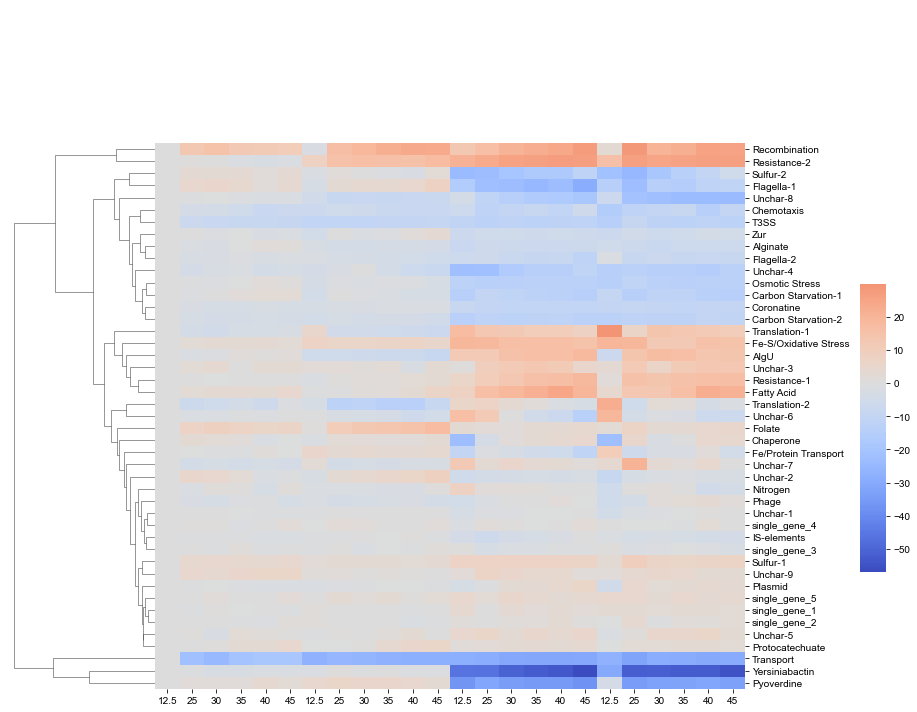

In [7]:
#clustermap of activity levels of all iModulons 

ax = sns.clustermap(data_co_culture, 
                    col_cluster = False, 
                    figsize = (12,10), 
                    yticklabels = True,
                   cbar_pos=(1, .2, .03, .4),
                   cmap = 'coolwarm',
                   center = 0)

In [9]:
#creating a reduced dataframe with only iModulons with absolute value of activity levels greater than 10 at atleast one timepoint 
#(with the exception of Flagella-1 iModulon, in order to show downregulation of motility)

data_co_culture_reduced = data_co_culture

# remove rows with all (absolute) values less than 10 except for Flagella-1 (we want to show all 3 motility iMs)
for idx, row in data_co_culture.iterrows():
    if idx != 'Flagella-1':
    # arrange values in each row in descending order of absolute values and check if the first value (highest) is <= 10
        if data_co_culture.loc[idx].abs().sort_values(ascending = False).values[0] <= 10:
            data_co_culture_reduced = data_co_culture_reduced.drop(idx)

In [18]:
# checking next highest -ve value after Bactin at the 12.5 h mark --> Pyoverdine iModulon, -37.003152

data_pst_bt.sort_values('12.5', ascending = True)

,12.5,25,30,35,40,45
Yersiniabactin,-46.294446,-46.750737,-50.633137,-52.656271,-53.494559,-56.863675
Pyoverdine,-37.003152,-31.650807,-34.383649,-35.384574,-35.297120,-37.302052
Transport,-28.037977,-29.242733,-31.053293,-31.344989,-31.350744,-31.067399
Sulfur-2,-24.193397,-23.224361,-19.796615,-17.365997,-17.701481,-11.773539
Chaperone,-22.644473,-3.383175,1.459742,2.880119,3.722583,4.223593
Unchar-4,-22.530719,-22.162622,-16.715067,-14.273753,-14.395832,-11.204352
Flagella-1,-16.286886,-22.374910,-23.535226,-25.066387,-23.466395,-29.360539
Carbon Starvation-1,-14.125623,-10.261680,-11.192588,-12.555820,-12.828028,-14.153052
Carbon Starvation-2,-13.511677,-11.682262,-12.650146,-12.334942,-11.681324,-13.129210
Osmotic Stress,-12.711239,-14.015877,-13.527183,-13.262563,-13.307086,-13.379396


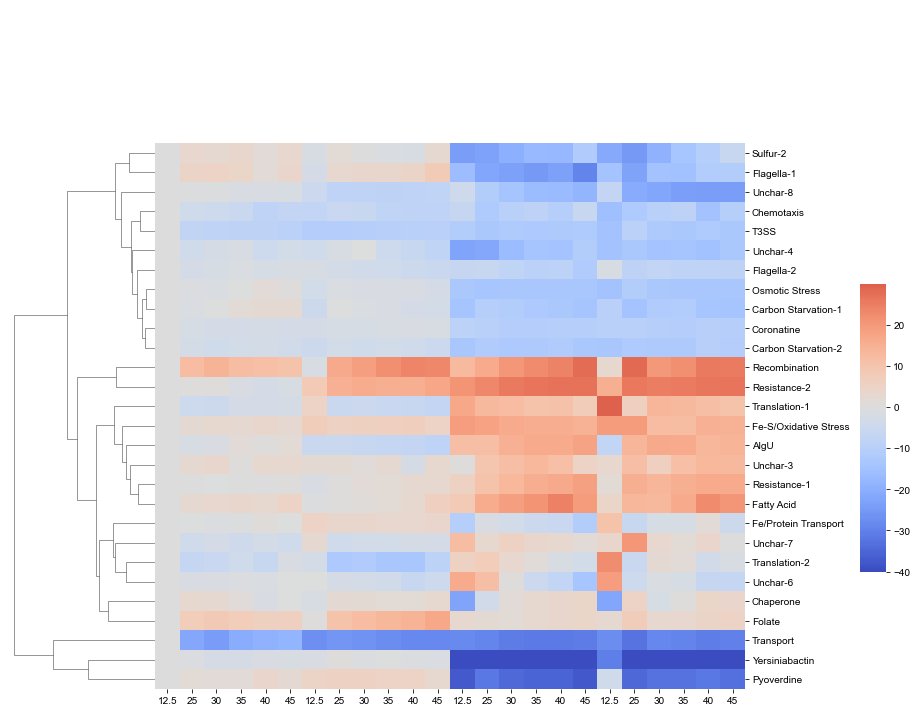

In [10]:
# fig 2A
# clustermap of activity levels of selected iModulons across all timepoints
# vmin set to -40 based on next lowest iModulon activity at 12.5 h after Yersiniabactin iModulon

ax = sns.clustermap(data_co_culture_reduced, 
                    col_cluster = False, 
                    figsize = (12,10), 
                    yticklabels = True,
                   cbar_pos=(1, .2, .03, .4),
                   cmap = 'coolwarm',
                   center = 0,
                   vmin = -40)

### Figure 2B - D

In [11]:
# selecting rows from sample table with monoculture and coculture sample

co_culture_table = ica_PS.sample_table.loc[ica_PS.sample_table.project == 'co_culture']
co_culture_table['co_culture'] = co_culture_table['co_culture'].fillna('mono_culture')

#creating groups based on coculture membership
groups = dict(zip(co_culture_table.index, co_culture_table.co_culture))

C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\1214447638.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co_culture_table['co_culture'] = co_culture_table['co_culture'].fillna('mono_culture')


In [12]:
def compare_activities_co_culture(ica_data, imodulon1, imodulon2, groups = groups, **kwargs):
    """
    Create a scatterplot comparing the compendium-wide activities of two iModulons

    Parameters
    ----------
    ica_data: ~pymodulon.core.IcaData
        :class:`~pymodulon.core.IcaData` object
    imodulon1: int or str
        Name of the iModulon to plot on the x-axis
    imodulon2: int or str
        Name of the iModulon to plot on the y-axis
    **kwargs:
        Additional keyword arguments passed to :func:`pymodulon.plotting.scatterplot`

    Returns
    -------
    ax: ~matplotlib.axes.Axes
        :class:`~matplotlib.axes.Axes` containing the scatterplot
    """
    # list of iModulon activities in monoculture/coculture samples for selected iModulons
    x = ica_data.A[ica_data.sample_table.loc[ica_data.sample_table.project == 'co_culture'].index.values].loc[imodulon1]
    y = ica_data.A[ica_data.sample_table.loc[ica_data.sample_table.project == 'co_culture'].index.values].loc[imodulon2]

    xlabel = f"{imodulon1} iModulon Activity"
    ylabel = f"{imodulon2} iModulon Activity"

    # Remove xlabel, ylabel, and fit_line kwargs if provided
    kwargs.pop("xlabel", None)
    kwargs.pop("ylabel", None)
    kwargs.pop("fit_line", None)

    colors = ['dodgerblue','red','grey','darkorchid']
    
    # Scatter Plot
    ax = scatterplot(x, y, xlabel=xlabel, ylabel=ylabel, fit_line=True, groups = groups, colors = colors, **kwargs)
    ax.legend(loc = (1.2, 0))
    
    return ax

<AxesSubplot: xlabel='Resistance-1 iModulon Activity', ylabel='Flagella-1 iModulon Activity'>

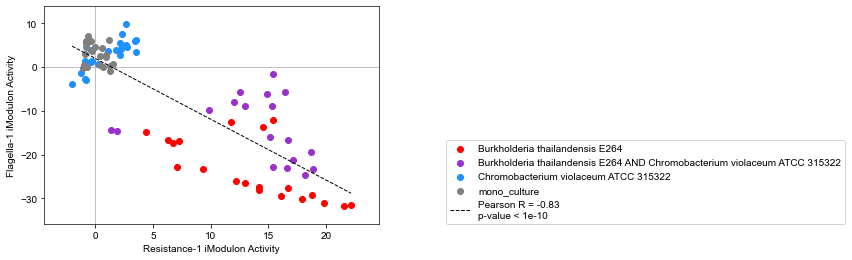

In [13]:
#fig 2B
compare_activities_co_culture(ica_PS, 'Resistance-1', 'Flagella-1', groups = groups)

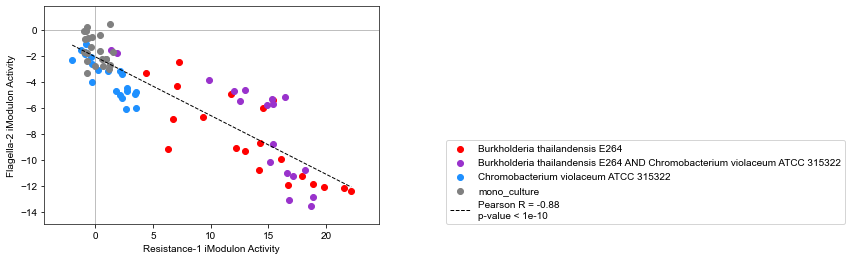

In [14]:
#fig 2C
ax = compare_activities_co_culture(ica_PS, 'Resistance-1', 'Flagella-2', groups = groups)

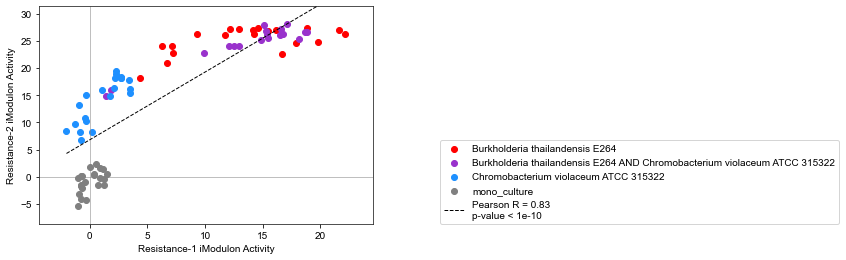

In [15]:
#fig 2D
ax = compare_activities_co_culture(ica_PS, 'Resistance-1', 'Resistance-2', groups = groups)

### Figure 2E - I

In [25]:
# function to create time course plots
# cant get the color right with the error bars...

def time_course_plot(k, ica, ax = None):
    
    '''
    time course plot for co-culture samples in PS
    k = iM name
    ica = ica_PS
    '''
    #iModulon index in A matrix
    im_list = ica.A.index.values.tolist()
    n = im_list.index(k)
    
    #empty list to store sample means
    sample_means = []
    mono_sem = []
    c_vio_sem = []
    b_thai_sem = []
    all_sem = []
    
    #list of co-culture and time points
    co_cultures = ['Chromobacterium violaceum ATCC 315322', 'Burkholderia thailandensis E264', 'Burkholderia thailandensis E264 AND Chromobacterium violaceum ATCC 315322', 'mono_culture']
    time = [12.5, 25.0, 30.0, 35.0, 40.0, 45.0]
    
    #sample table with only co-culture samples
    sample_table_cc = ica.sample_table.loc[ica.sample_table.project == 'co_culture']
    sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')

    #group samples from each co-culture
    cc_group = sample_table_cc.groupby('co_culture')
    
    #start a figure
    if ax == None:
        fig, ax = plt.subplots()
    
    #for loop for each co-culture
    for cc in co_cultures:
        #group each sample for specific co-culture based on time
        time_cc_group = cc_group.get_group(cc).groupby('time')
        
        #find mean of sample activities for each time point
        for t in time:
            samples_at_t = time_cc_group.get_group(t).index.tolist()
            activities = ica.A[samples_at_t].iloc[n]
            sample_means.append(activities.mean())
            if cc == 'Chromobacterium violaceum ATCC 315322':
                c_vio_sem.append(sem(activities))
            if cc == 'Burkholderia thailandensis E264':
                b_thai_sem.append(sem(activities))
            if cc == 'mono_culture':
                mono_sem.append(sem(activities))
            if cc == 'Burkholderia thailandensis E264 AND Chromobacterium violaceum ATCC 315322':
                all_sem.append(sem(activities))
                
    #add lines and other details to the plot
    ax.plot(time,sample_means[18:24], label = 'Pseudomonas syringae mono-culture', color = 'tab:grey', linewidth = 1)
    ax.errorbar(time, sample_means[18:24], yerr = mono_sem, capsize = 2, elinewidth = 0.6, color = "grey", ecolor = 'black', fmt="")

    ax.plot(time,sample_means[0:6], label = 'Chromobacterium violaceum \nATCC 315322', color = 'tab:blue', linewidth = 1)
    ax.errorbar(time, sample_means[0:6], yerr = c_vio_sem, capsize = 2, elinewidth = 0.6, color = 'blue', ecolor = 'black', fmt="")

    ax.plot(time,sample_means[6:12], label = 'Burkholderia thailandensis E264', color = 'tab:red', linewidth = 1)
    ax.errorbar(time, sample_means[6:12], yerr = b_thai_sem, capsize = 2, elinewidth = 0.6, color = 'red', ecolor = 'black', fmt="")

    ax.plot(time,sample_means[12:18], label = 'Burkholderia thailandensis E264 \nAND Chromobacterium violaceum \nATCC 315322', color = 'tab:purple', linewidth = 1)
    ax.errorbar(time, sample_means[12:18], yerr = all_sem, capsize = 2, elinewidth = 0.6, color = 'purple', ecolor = 'black', fmt="")

    ax.set_xlabel('Time (h)', fontsize = 10)
    ax.set_ylabel(str(k) +' '+'iModulon Activity', fontsize = 10)
    ax.legend()
    plt.legend(loc = (1,0))
    
    return ax

C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\2735800158.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\99hee\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<AxesSubplot: xlabel='Time (h)', ylabel='AlgU iModulon Activity'>

C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\2735800158.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\99hee\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<AxesSubplot: xlabel='Time (h)', ylabel='Pyoverdine iModulon Activity'>

C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\2735800158.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\99hee\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<AxesSubplot: xlabel='Time (h)', ylabel='Yersiniabactin iModulon Activity'>

C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\2735800158.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\99hee\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<AxesSubplot: xlabel='Time (h)', ylabel='Recombination iModulon Activity'>

C:\Users\99hee\AppData\Local\Temp\ipykernel_9992\2735800158.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_table_cc['co_culture'] = sample_table_cc['co_culture'].replace(np.nan, 'mono_culture')
C:\Users\99hee\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\99hee\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<AxesSubplot: xlabel='Time (h)', ylabel='Folate iModulon Activity'>

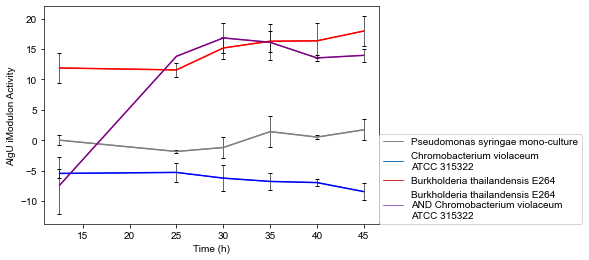

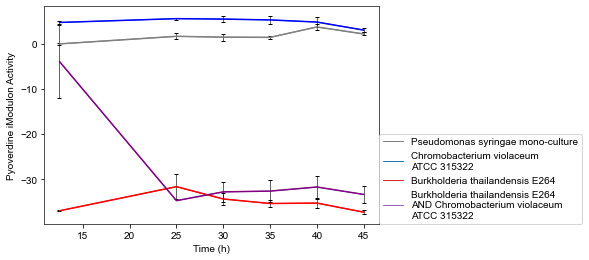

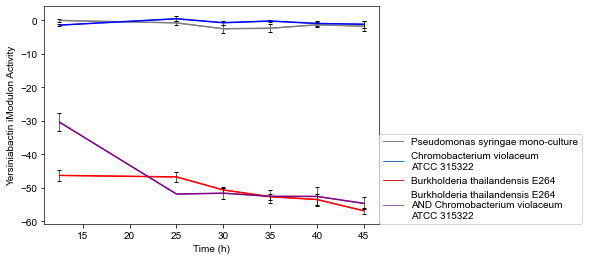

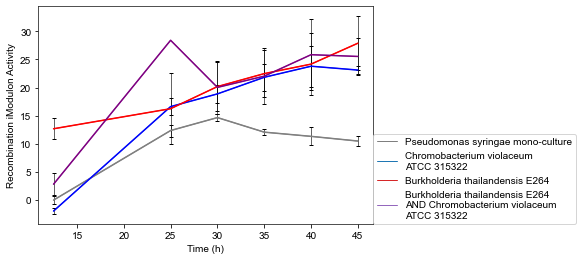

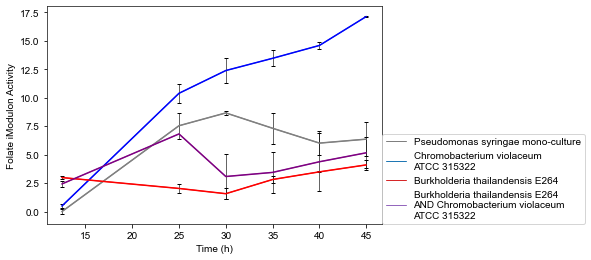

In [26]:
#fig 2E
display(time_course_plot('AlgU', ica_PS))

#fig 2F
display(time_course_plot('Pyoverdine', ica_PS))

#fig 2G
display(time_course_plot('Yersiniabactin', ica_PS))

#fig 2H
display(time_course_plot('Recombination', ica_PS))

#fig 2I
display(time_course_plot('Folate', ica_PS))